In [1]:
# Filtering out the warnings

import warnings

warnings.filterwarnings('ignore')

In [2]:
# Importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# <font color = blue> IMDb Movie Assignment </font>

You have the data for the 100 top-rated movies from the past decade along with various pieces of information about the movie, its actors, and the voters who have rated these movies online. In this assignment, you will try to find some interesting insights into these movies and their voters, using Python.

##  Task 1: Reading the data

- ### Subtask 1.1: Read the Movies Data.

Read the movies data file provided and store it in a dataframe `movies`.

In [3]:
# Read the csv file using 'read_csv'. Please write your dataset location here.
movies = pd.read_csv("Movie+Assignment+Data.csv")


- ###  Subtask 1.2: Inspect the Dataframe

Inspect the dataframe for dimensions, null-values, and summary of different numeric columns.

In [4]:
# Check the number of rows and columns in the dataframe
print(f"Rows: {movies.shape[0]} Columns: {movies.shape[1]}")

Rows: 100 Columns: 62


In [5]:
# Check the column-wise info of the dataframe
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 62 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Title                   100 non-null    object 
 1   title_year              100 non-null    int64  
 2   budget                  100 non-null    int64  
 3   Gross                   100 non-null    int64  
 4   actor_1_name            100 non-null    object 
 5   actor_2_name            100 non-null    object 
 6   actor_3_name            100 non-null    object 
 7   actor_1_facebook_likes  100 non-null    int64  
 8   actor_2_facebook_likes  99 non-null     float64
 9   actor_3_facebook_likes  98 non-null     float64
 10  IMDb_rating             100 non-null    float64
 11  genre_1                 100 non-null    object 
 12  genre_2                 97 non-null     object 
 13  genre_3                 74 non-null     object 
 14  MetaCritic              95 non-null     flo

In [6]:
# Check the columns with missing values
COLS = movies.columns.to_list()
print("Columns with missing values:")
for col in COLS:
    numNullCols = movies[col].isnull().sum()
    if numNullCols > 0:
        print(f"\t{col} {numNullCols}")

Columns with missing values:
	actor_2_facebook_likes 1
	actor_3_facebook_likes 2
	genre_2 3
	genre_3 26
	MetaCritic 5


In [7]:
# Check the summary for the numeric columns 
movies.describe()

,title_year,budget,Gross,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,IMDb_rating,MetaCritic,Runtime,CVotes10,...,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS
count,100.000000,1.000000e+02,1.000000e+02,100.000000,99.000000,98.000000,100.000000,95.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,2012.820000,7.838400e+07,1.468679e+08,13407.270000,7377.303030,3002.153061,7.883000,78.252632,126.420000,73212.160000,...,7.982000,7.732000,7.723000,7.780000,7.65100,7.624000,7.770000,7.274000,7.958000,7.793000
std,1.919491,7.445295e+07,1.454004e+08,10649.037862,13471.568216,6940.301133,0.247433,9.122066,19.050799,82669.594746,...,0.321417,0.251814,0.260479,0.282128,0.21485,0.213258,0.301344,0.361987,0.232327,0.264099
min,2010.000000,3.000000e+06,2.238380e+05,39.000000,12.000000,0.000000,7.500000,62.000000,91.000000,6420.000000,...,7.300000,7.300000,7.200000,7.200000,7.10000,7.100000,7.000000,6.400000,7.500000,7.300000
25%,2011.000000,1.575000e+07,4.199752e+07,1000.000000,580.000000,319.750000,7.700000,72.000000,114.750000,30587.000000,...,7.700000,7.600000,7.500000,7.600000,7.50000,7.475000,7.500000,7.100000,7.800000,7.600000
50%,2013.000000,4.225000e+07,1.070266e+08,13000.000000,1000.000000,626.500000,7.800000,78.000000,124.000000,54900.500000,...,8.000000,7.700000,7.700000,7.800000,7.65000,7.600000,7.800000,7.300000,7.950000,7.750000
75%,2014.000000,1.500000e+08,2.107548e+08,20000.000000,11000.000000,1000.000000,8.100000,83.500000,136.250000,80639.000000,...,8.200000,7.900000,7.900000,8.000000,7.80000,7.800000,7.925000,7.500000,8.100000,7.925000
max,2016.000000,2.600000e+08,9.366622e+08,35000.000000,96000.000000,46000.000000,8.800000,100.000000,180.000000,584839.000000,...,8.800000,8.700000,8.700000,8.500000,8.10000,8.100000,8.500000,8.200000,8.700000,8.800000


## Task 2: Data Analysis

Now that we have loaded the dataset and inspected it, we see that most of the data is in place. As of now, no data cleaning is required, so let's start with some data manipulation, analysis, and visualisation to get various insights about the data. 

-  ###  Subtask 2.1: Reduce those Digits!

These numbers in the `budget` and `gross` are too big, compromising its readability. Let's convert the unit of the `budget` and `gross` columns from `$` to `million $` first.

In [8]:
# Divide the 'gross' and 'budget' columns by 1000000 to convert '$' to 'million $'
print(f"{'Before conversion [unit - $]:':40} {movies['Gross'][0]:10}, {movies['budget'][0]:10}")
movies['Gross'] = round(movies['Gross']/1000000); movies['Gross'] = movies['Gross'] .astype('int')
movies['budget'] = round(movies['budget']/1000000); movies['budget'] = movies['budget'] .astype('int')
print(f"{'After conversion [unit - million $]:':40} {movies['Gross'][0]:10}, {movies['budget'][0]:10}")

Before conversion [unit - $]:             151101803,   30000000
After conversion [unit - million $]:            151,         30


-  ###  Subtask 2.2: Let's Talk Profit!

    1. Create a new column called `profit` which contains the difference of the two columns: `gross` and `budget`.
    2. Sort the dataframe using the `profit` column as reference.
    3. Extract the top ten profiting movies in descending order and store them in a new dataframe - `top10`.
    4. Plot a scatter or a joint plot between the columns `budget` and `profit` and write a few words on what you observed.
    5. Extract the movies with a negative profit and store them in a new dataframe - `neg_profit`

In [9]:
# Create the new column named 'profit' by subtracting the 'budget' column from the 'gross' column
movies['profit'] = movies['Gross'] - movies['budget']
movies[['Gross', 'budget', 'profit']].head()

,Gross,budget,profit
0,151,30,121
1,341,150,191
2,52,12,40
3,101,47,54
4,48,9,39


In [10]:
# Sort the dataframe with the 'profit' column as reference using the 'sort_values' function. Make sure to set the argument
#'ascending' to 'False'
movies_sorted = movies.sort_values(by=['profit'], ascending=False)
movies_sorted[['Title', 'profit']].head()

,Title,profit
97,Star Wars: Episode VII - The Force Awakens,692
11,The Avengers,403
47,Deadpool,305
32,The Hunger Games: Catching Fire,295
12,Toy Story 3,215


In [11]:
# Get the top 10 profitable movies by using position based indexing. Specify the rows till 10 (0-9)
movies_top_10 = movies_sorted.iloc[0:10, :]
movies_top_10[['Title','budget','Gross','profit']]

,Title,budget,Gross,profit
97,Star Wars: Episode VII - The Force Awakens,245,937,692
11,The Avengers,220,623,403
47,Deadpool,58,363,305
32,The Hunger Games: Catching Fire,130,425,295
12,Toy Story 3,200,415,215
45,The Lego Movie,60,258,198
8,The Dark Knight Rises,250,448,198
1,Zootopia,150,341,191
41,Despicable Me,69,252,183
18,Inside Out,175,356,181


<Figure size 1600x800 with 0 Axes>

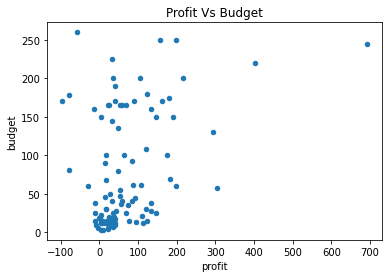

In [12]:
#Plot profit vs budget
plt.figure(figsize=(20, 10), dpi=80)
ax = movies.plot.scatter('profit', 'budget')
ax.set_title("Profit Vs Budget")
plt.show()

The dataset contains the 100 best performing movies from the year 2010 to 2016. However, the scatter plot tells a different story. You can notice that there are some movies with negative profit. Although good movies do incur losses, but there appear to be quite a few movie with losses. What can be the reason behind this? Lets have a closer look at this by finding the movies with negative profit.

In [13]:
#Find the movies with negative profit
movies_neg_profit = movies.loc[movies['profit'] < 0, :]
movies_neg_profit.head()

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit
7,Tangled,2010,260,201,Brad Garrett,Donna Murphy,M.C. Gainey,799,553.0,284.0,...,8.0,7.7,7.6,7.9,6.9,7.9,7.7,PG,USA,-59
17,Edge of Tomorrow,2014,178,100,Tom Cruise,Lara Pulver,Noah Taylor,10000,854.0,509.0,...,7.7,7.8,7.8,7.8,7.5,8.0,7.8,PG-13,USA,-78
22,Hugo,2011,170,74,ChloÃ« Grace Moretz,Christopher Lee,Ray Winstone,17000,16000.0,1000.0,...,7.4,7.5,7.5,7.6,7.4,7.7,7.5,PG,USA,-96
28,X-Men: First Class,2011,160,146,Jennifer Lawrence,Michael Fassbender,Oliver Platt,34000,13000.0,1000.0,...,7.8,7.6,7.5,7.7,7.3,7.8,7.7,PG-13,USA,-14
39,The Little Prince,2015,81,1,Jeff Bridges,James Franco,Mackenzie Foy,12000,11000.0,6000.0,...,7.9,7.5,7.4,7.9,6.6,7.7,7.7,PG,France,-80


**`Checkpoint 1:`** Can you spot the movie `Tangled` in the dataset? You may be aware of the movie 'Tangled'. Although its one of the highest grossing movies of all time, it has negative profit as per this result. If you cross check the gross values of this movie (link: https://www.imdb.com/title/tt0398286/), you can see that the gross in the dataset accounts only for the domestic gross and not the worldwide gross. This is true for may other movies also in the list.

- ### Subtask 2.3: The General Audience and the Critics

You might have noticed the column `MetaCritic` in this dataset. This is a very popular website where an average score is determined through the scores given by the top-rated critics. Second, you also have another column `IMDb_rating` which tells you the IMDb rating of a movie. This rating is determined by taking the average of hundred-thousands of ratings from the general audience. 

As a part of this subtask, you are required to find out the highest rated movies which have been liked by critics and audiences alike.
1. Firstly you will notice that the `MetaCritic` score is on a scale of `100` whereas the `IMDb_rating` is on a scale of 10. First convert the `MetaCritic` column to a scale of 10.
2. Now, to find out the movies which have been liked by both critics and audiences alike and also have a high rating overall, you need to -
    - Create a new column `Avg_rating` which will have the average of the `MetaCritic` and `Rating` columns
    - Retain only the movies in which the absolute difference(using abs() function) between the `IMDb_rating` and `Metacritic` columns is less than 0.5. Refer to this link to know how abs() funtion works - https://www.geeksforgeeks.org/abs-in-python/ .
    - Sort these values in a descending order of `Avg_rating` and retain only the movies with a rating equal to or greater than `8` and store these movies in a new dataframe `UniversalAcclaim`.
    

In [14]:
# Change the scale of MetaCritic
print(f"{'Before conversion:':20} {movies['MetaCritic'][0]:3}")
movies['MetaCritic'] = movies['MetaCritic']/10
print(f"{'After conversion:':20} {movies['MetaCritic'][0]:3}")

Before conversion:   93.0
After conversion:    9.3


In [15]:
# Find the average ratings
movies['Avg_rating'] = (movies['MetaCritic'] + movies['IMDb_rating'])/2
movies[['MetaCritic', 'IMDb_rating', 'Avg_rating']].head()

,MetaCritic,IMDb_rating,Avg_rating
0,9.3,8.2,8.75
1,7.8,8.1,7.95
2,6.9,8.1,7.50
3,8.1,8.0,8.05
4,9.6,7.9,8.75


In [16]:
#Sort in descending order of average rating
movies_sorted = movies.sort_values(by=['Avg_rating'], ascending=False)
movies_sorted[['Title', 'MetaCritic', 'IMDb_rating', 'Avg_rating']]

,Title,MetaCritic,IMDb_rating,Avg_rating
94,Boyhood,10.0,7.9,8.95
69,12 Years a Slave,9.6,8.1,8.85
18,Inside Out,9.4,8.2,8.80
0,La La Land,9.3,8.2,8.75
12,Toy Story 3,9.2,8.3,8.75
...,...,...,...,...
16,The Hobbit: An Unexpected Journey,NaN,7.9,NaN
52,Lone Survivor,NaN,7.5,NaN
71,The Book Thief,NaN,7.6,NaN
82,Flipped,NaN,7.7,NaN


In [17]:
# Find the movies with metacritic-Imdb rating < 0.5 and also with an average rating of >= 8 (sorted in descending order)
movies_top_rated = movies.loc[(abs(movies['MetaCritic'] - movies['IMDb_rating'])<0.5) & 
                              (movies['Avg_rating'] > 8), :].sort_values(by=['Avg_rating'],ascending=False)
movies_top_rated[['Title','MetaCritic', 'IMDb_rating', 'Avg_rating' ]].head()

,Title,MetaCritic,IMDb_rating,Avg_rating
95,Whiplash,8.8,8.5,8.65
35,Django Unchained,8.1,8.4,8.25
93,Dallas Buyers Club,8.4,8.0,8.20
97,Star Wars: Episode VII - The Force Awakens,8.1,8.1,8.10
3,Arrival,8.1,8.0,8.05


**`Checkpoint 2:`** Can you spot a `Star Wars` movie in your final dataset?

- ### Subtask 2.4: Find the Most Popular Trios - I

You're a producer looking to make a blockbuster movie. There will primarily be three lead roles in your movie and you wish to cast the most popular actors for it. Now, since you don't want to take a risk, you will cast a trio which has already acted in together in a movie before. The metric that you've chosen to check the popularity is the Facebook likes of each of these actors.

The dataframe has three columns to help you out for the same, viz. `actor_1_facebook_likes`, `actor_2_facebook_likes`, and `actor_3_facebook_likes`. Your objective is to find the trios which has the most number of Facebook likes combined. That is, the sum of `actor_1_facebook_likes`, `actor_2_facebook_likes` and `actor_3_facebook_likes` should be maximum.
Find out the top 5 popular trios, and output their names in a list.


In [18]:
# Write your code here
movies['total_likes'] = movies['actor_1_facebook_likes'] + movies['actor_2_facebook_likes'] + movies['actor_3_facebook_likes']
movies_sorted = movies.sort_values(by=['total_likes'],ascending=False)[['actor_1_name','actor_2_name', 'actor_3_name','total_likes','actor_1_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes']]
movies_top5_trios = movies_sorted[0:5][['actor_1_name','actor_2_name', 'actor_3_name','total_likes','actor_1_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes']]
print(movies_top5_trios)

# Print as a list
top5_trios = []
for index, row in movies_top5_trios.iterrows():
    top5_trios.append([row['actor_1_name'], row['actor_2_name'], row['actor_3_name']])

print("Top 5 trios:")
[ print(f"\t{trio}") for trio in top5_trios]
print()

         actor_1_name        actor_2_name          actor_3_name  total_likes  \
2           Dev Patel       Nicole Kidman           Rooney Mara     138800.0   
27  Leonardo DiCaprio           Tom Hardy  Joseph Gordon-Levitt      79000.0   
14  Jennifer Lawrence      Peter Dinklage          Hugh Jackman      76000.0   
4       Casey Affleck  Michelle Williams          Kyle Chandler      74818.0   
8           Tom Hardy      Christian Bale  Joseph Gordon-Levitt      73000.0   

    actor_1_facebook_likes  actor_2_facebook_likes  actor_3_facebook_likes  
2                    33000                 96000.0                  9800.0  
27                   29000                 27000.0                 23000.0  
14                   34000                 22000.0                 20000.0  
4                      518                 71000.0                  3300.0  
8                    27000                 23000.0                 23000.0  
Top 5 trios:
	['Dev Patel', 'Nicole Kidman', 'Rooney Mara

- ### Subtask 2.5: Find the Most Popular Trios - II

In the previous subtask you found the popular trio based on the total number of facebook likes. Let's add a small condition to it and make sure that all three actors are popular. The condition is **none of the three actors' Facebook likes should be less than half of the other two**. For example, the following is a valid combo:
- actor_1_facebook_likes: 70000
- actor_2_facebook_likes: 40000
- actor_3_facebook_likes: 50000

But the below one is not:
- actor_1_facebook_likes: 70000
- actor_2_facebook_likes: 40000
- actor_3_facebook_likes: 30000

since in this case, `actor_3_facebook_likes` is 30000, which is less than half of `actor_1_facebook_likes`.

Having this condition ensures that you aren't getting any unpopular actor in your trio (since the total likes calculated in the previous question doesn't tell anything about the individual popularities of each actor in the trio.).

You can do a manual inspection of the top 5 popular trios you have found in the previous subtask and check how many of those trios satisfy this condition. Also, which is the most popular trio after applying the condition above? Write your answers in the markdown cell provided below.

**Write your answers below.**

- **`No. of trios that satisfy the above condition:`** 3 
- **`Most popular trio after applying the condition:`** Leonardo DiCaprio, Tom Hardy, Joseph Gordon-Levitt

**`Optional:`** Even though you are finding this out by a natural inspection of the dataframe, can you also achieve this through some *if-else* statements to incorporate this. You can try this out on your own time after you are done with the assignment.

In [19]:
# Your answer here (optional and not graded)



- ### Subtask 2.6: Runtime Analysis

There is a column named `Runtime` in the dataframe which primarily shows the length of the movie. It might be intersting to see how this variable this distributed. Plot a `histogram` or `distplot` of seaborn to find the `Runtime` range most of the movies fall into.

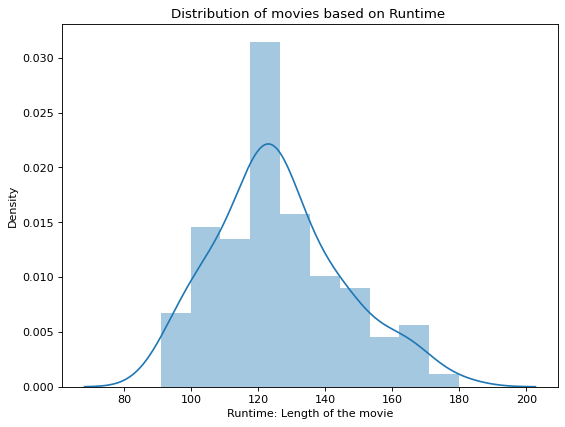

In [20]:
# Runtime histogram/density plot
plt.figure(figsize=(8, 6), dpi=80)
ax = sns.distplot(movies['Runtime'])
ax.set_title("Distribution of movies based on Runtime ")
ax.set_xlabel('Runtime: Length of the movie')
plt.show()


**`Checkpoint 3:`** Most of the movies appear to be sharply 2 hour-long.

- ### Subtask 2.7: R-Rated Movies

Although R rated movies are restricted movies for the under 18 age group, still there are vote counts from that age group. Among all the R rated movies that have been voted by the under-18 age group, find the top 10 movies that have the highest number of votes i.e.`CVotesU18` from the `movies` dataframe. Store these in a dataframe named `PopularR`.

In [21]:
# Write your code here
movies['content_rating'].unique()


array(['PG-13', 'PG', 'R', 'G'], dtype=object)

In [22]:
movies_sorted = movies[movies['content_rating']=='R'].sort_values(by=['CVotesU18'], ascending=False)
PopularR = movies_sorted[:10]
PopularR[['Title','content_rating','CVotesU18']]

,Title,content_rating,CVotesU18
47,Deadpool,R,4598
36,The Wolf of Wall Street,R,3622
35,Django Unchained,R,3250
29,Mad Max: Fury Road,R,3159
95,Whiplash,R,2878
31,The Revenant,R,2619
40,Shutter Island,R,2321
43,Gone Girl,R,2286
65,The Grand Budapest Hotel,R,2083
72,Birdman or (The Unexpected Virtue of Ignorance),R,1891


**`Checkpoint 4:`** Are these kids watching `Deadpool` a lot?

## Task 3 : Demographic analysis

If you take a look at the last columns in the dataframe, most of these are related to demographics of the voters (in the last subtask, i.e., 2.8, you made use one of these columns - CVotesU18). We also have three genre columns indicating the genres of a particular movie. We will extensively use these columns for the third and the final stage of our assignment wherein we will analyse the voters across all demographics and also see how these vary across various genres. So without further ado, let's get started with `demographic analysis`.

-  ###  Subtask 3.1 Combine the Dataframe by Genres

There are 3 columns in the dataframe - `genre_1`, `genre_2`, and `genre_3`. As a part of this subtask, you need to aggregate a few values over these 3 columns. 
1. First create a new dataframe `df_by_genre` that contains `genre_1`, `genre_2`, and `genre_3` and all the columns related to **CVotes/Votes** from the `movies` data frame. There are 47 columns to be extracted in total.
2. Now, Add a column called `cnt` to the dataframe `df_by_genre` and initialize it to one. You will realise the use of this column by the end of this subtask.
3. First group the dataframe `df_by_genre` by `genre_1` and find the sum of all the numeric columns such as `cnt`, columns related to CVotes and Votes columns and store it in a dataframe `df_by_g1`.
4. Perform the same operation for `genre_2` and `genre_3` and store it dataframes `df_by_g2` and `df_by_g3` respectively. 
5. Now that you have 3 dataframes performed by grouping over `genre_1`, `genre_2`, and `genre_3` separately, it's time to combine them. For this, add the three dataframes and store it in a new dataframe `df_add`, so that the corresponding values of Votes/CVotes get added for each genre.There is a function called `add()` in pandas which lets you do this. You can refer to this link to see how this function works. https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.add.html
6. The column `cnt` on aggregation has basically kept the track of the number of occurences of each genre.Subset the genres that have atleast 10 movies into a new dataframe `genre_top10` based on the `cnt` column value.
7. Now, take the mean of all the numeric columns by dividing them with the column value `cnt` and store it back to the same dataframe. We will be using this dataframe for further analysis in this task unless it is explicitly mentioned to use the dataframe `movies`.
8. Since the number of votes can't be a fraction, type cast all the CVotes related columns to integers. Also, round off all the Votes related columns upto two digits after the decimal point.


In [23]:
# Print the columns to find the indices of the columns we are interested in
COLS = movies.columns.to_list()
print(len(COLS))
[ print(i, COLS[i], end=' ') for i in range(len(COLS))]
print()

65
0 Title 1 title_year 2 budget 3 Gross 4 actor_1_name 5 actor_2_name 6 actor_3_name 7 actor_1_facebook_likes 8 actor_2_facebook_likes 9 actor_3_facebook_likes 10 IMDb_rating 11 genre_1 12 genre_2 13 genre_3 14 MetaCritic 15 Runtime 16 CVotes10 17 CVotes09 18 CVotes08 19 CVotes07 20 CVotes06 21 CVotes05 22 CVotes04 23 CVotes03 24 CVotes02 25 CVotes01 26 CVotesMale 27 CVotesFemale 28 CVotesU18 29 CVotesU18M 30 CVotesU18F 31 CVotes1829 32 CVotes1829M 33 CVotes1829F 34 CVotes3044 35 CVotes3044M 36 CVotes3044F 37 CVotes45A 38 CVotes45AM 39 CVotes45AF 40 CVotes1000 41 CVotesUS 42 CVotesnUS 43 VotesM 44 VotesF 45 VotesU18 46 VotesU18M 47 VotesU18F 48 Votes1829 49 Votes1829M 50 Votes1829F 51 Votes3044 52 Votes3044M 53 Votes3044F 54 Votes45A 55 Votes45AM 56 Votes45AF 57 Votes1000 58 VotesUS 59 VotesnUS 60 content_rating 61 Country 62 profit 63 Avg_rating 64 total_likes 


In [24]:
# Create the dataframe df_by_genre
print("Before concatenation: \n", movies.iloc[0:1, [11, 12, 13,16, 17, 18, 19, 20]]) # Using 0:1 instead of 0 to print the row in a single line
df_by_genre = pd.concat( [movies.iloc[:, 11:14], movies.iloc[:, 16:60]],axis=1)
print("After concatenation: \n", df_by_genre.iloc[0:1, 0:8])
df_by_genre.head()

Before concatenation: 
   genre_1 genre_2 genre_3  CVotes10  CVotes09  CVotes08  CVotes07  CVotes06
0  Comedy   Drama   Music     74245     71191     64640     38831     17377
After concatenation: 
   genre_1 genre_2 genre_3  CVotes10  CVotes09  CVotes08  CVotes07  CVotes06
0  Comedy   Drama   Music     74245     71191     64640     38831     17377


,genre_1,genre_2,genre_3,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,...,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS
0,Comedy,Drama,Music,74245,71191,64640,38831,17377,8044,3998,...,8.2,7.9,7.9,7.8,7.6,7.6,7.5,7.1,8.3,8.1
1,Animation,Adventure,Comedy,53626,70912,102352,57261,16719,4539,1467,...,8.4,7.8,7.8,8.1,7.8,7.8,8.1,7.6,8.0,8.0
2,Biography,Drama,NaN,23325,29830,40564,20296,5842,1669,558,...,8.4,8.0,7.9,8.2,8.0,7.9,8.4,7.1,8.1,8.0
3,Drama,Mystery,Sci-Fi,55533,87850,109536,65440,26913,10556,5057,...,8.1,7.8,7.8,7.8,7.6,7.6,7.7,7.3,8.0,7.9
4,Drama,NaN,NaN,18191,33532,46596,29626,11879,4539,1976,...,7.8,7.7,7.7,7.7,7.6,7.6,7.6,7.1,7.9,7.8


In [25]:
# Create a column cnt and initialize it to 1
df_by_genre['cnt'] = 1
df_by_genre['cnt'].head()

0    1
1    1
2    1
3    1
4    1
Name: cnt, dtype: int64

In [26]:
# Group the movies by individual genres
df_by_g1 = df_by_genre.groupby(['genre_1']).sum()
df_by_g2 = df_by_genre.groupby(['genre_2']).sum()
df_by_g3 = df_by_genre.groupby(['genre_3']).sum()

print("df_by_g1", len(df_by_g1), df_by_g1.index, len(df_by_g1.columns.to_list()))
print("df_by_g2", len(df_by_g2), df_by_g2.index, len(df_by_g2.columns.to_list()))
print("df_by_g3", len(df_by_g3), df_by_g3.index, len(df_by_g3.columns.to_list()))

genres = set(df_by_g1.index.to_list() + df_by_g2.index.to_list() + df_by_g3.index.to_list())
print(len(genres), genres)

df_by_g1 8 Index(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Drama', 'Mystery'],
      dtype='object', name='genre_1') 45
df_by_g2 19 Index(['Action', 'Adventure', 'Biography', 'Comedy', 'Crime', 'Drama',
       'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western'],
      dtype='object', name='genre_2') 45
df_by_g3 15 Index(['Adventure', 'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'History',
       'Music', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War',
       'Western'],
      dtype='object', name='genre_3') 45
20 {'Music', 'Horror', 'Action', 'Comedy', 'Animation', 'Fantasy', 'Drama', 'Mystery', 'Musical', 'Sport', 'Biography', 'Thriller', 'Crime', 'Sci-Fi', 'Western', 'War', 'Adventure', 'Romance', 'Family', 'History'}


In [27]:
# Add the grouped data frames and store it in a new data frame
df_add = pd.concat( [df_by_g1, df_by_g2, df_by_g3])
df_add.reset_index(inplace=True)
df_add.rename(columns={'index':'genre'}, inplace=True)
df_add = df_add.groupby(by=['genre']).sum()
df_add.reset_index(inplace=True)
df_add

,genre,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
0,Action,3166467,3547429,4677755,2922126,1075354,393484,166970,95004,65573,...,240.0,239.5,241.8,237.0,236.4,240.4,226.2,247.6,240.6,31
1,Adventure,3594659,4014192,5262328,3281981,1212075,438970,183070,103318,69737,...,294.6,293.7,299.2,291.7,290.4,298.0,280.6,303.5,296.2,38
2,Animation,681562,798227,1153214,722782,251076,83069,30718,15733,10026,...,85.4,84.9,87.8,84.5,84.1,86.7,80.0,87.6,86.1,11
3,Biography,852003,1401608,2231078,1332980,425595,138648,53718,29510,20613,...,139.1,138.9,139.8,138.5,137.9,141.7,130.1,142.7,139.9,18
4,Comedy,1383616,1774987,2506851,1591069,600287,226852,97469,56218,39391,...,177.4,177.4,178.3,175.0,174.7,177.1,165.4,182.6,178.9,23
5,Crime,574526,967118,1419495,821390,278391,98690,42271,24713,16985,...,84.9,85.4,83.7,83.9,83.8,84.5,81.3,87.8,85.8,11
6,Drama,3404438,4935375,7107053,4319700,1529356,552312,235475,135126,94185,...,501.3,501.1,501.8,496.8,495.3,503.2,469.5,515.9,506.0,65
7,Family,98165,95675,180381,143401,59137,22971,9472,5128,3317,...,14.8,14.7,15.5,14.9,14.8,15.6,14.1,15.6,15.0,2
8,Fantasy,572452,602223,889767,599747,241831,93484,39403,22233,14693,...,53.3,53.1,55.0,53.4,52.8,55.5,50.5,54.9,53.7,7
9,History,151261,260387,394531,223062,67861,21233,7964,4384,3148,...,31.2,31.1,31.3,31.0,30.7,32.1,29.4,32.2,31.2,4


In [28]:
df_by_g1g2 = df_by_g1.add(df_by_g2, fill_value=0)
df_add = df_by_g1g2.add(df_by_g3, fill_value=0)
df_add.reset_index(inplace=True)
df_add.rename(columns={'index':'genre'}, inplace=True)
df_add

,genre,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
0,Action,3166467.0,3547429.0,4677755.0,2922126.0,1075354.0,393484.0,166970.0,95004.0,65573.0,...,240.0,239.5,241.8,237.0,236.4,240.4,226.2,247.6,240.6,31.0
1,Adventure,3594659.0,4014192.0,5262328.0,3281981.0,1212075.0,438970.0,183070.0,103318.0,69737.0,...,294.6,293.7,299.2,291.7,290.4,298.0,280.6,303.5,296.2,38.0
2,Animation,681562.0,798227.0,1153214.0,722782.0,251076.0,83069.0,30718.0,15733.0,10026.0,...,85.4,84.9,87.8,84.5,84.1,86.7,80.0,87.6,86.1,11.0
3,Biography,852003.0,1401608.0,2231078.0,1332980.0,425595.0,138648.0,53718.0,29510.0,20613.0,...,139.1,138.9,139.8,138.5,137.9,141.7,130.1,142.7,139.9,18.0
4,Comedy,1383616.0,1774987.0,2506851.0,1591069.0,600287.0,226852.0,97469.0,56218.0,39391.0,...,177.4,177.4,178.3,175.0,174.7,177.1,165.4,182.6,178.9,23.0
5,Crime,574526.0,967118.0,1419495.0,821390.0,278391.0,98690.0,42271.0,24713.0,16985.0,...,84.9,85.4,83.7,83.9,83.8,84.5,81.3,87.8,85.8,11.0
6,Drama,3404438.0,4935375.0,7107053.0,4319700.0,1529356.0,552312.0,235475.0,135126.0,94185.0,...,501.3,501.1,501.8,496.8,495.3,503.2,469.5,515.9,506.0,65.0
7,Family,98165.0,95675.0,180381.0,143401.0,59137.0,22971.0,9472.0,5128.0,3317.0,...,14.8,14.7,15.5,14.9,14.8,15.6,14.1,15.6,15.0,2.0
8,Fantasy,572452.0,602223.0,889767.0,599747.0,241831.0,93484.0,39403.0,22233.0,14693.0,...,53.3,53.1,55.0,53.4,52.8,55.5,50.5,54.9,53.7,7.0
9,History,151261.0,260387.0,394531.0,223062.0,67861.0,21233.0,7964.0,4384.0,3148.0,...,31.2,31.1,31.3,31.0,30.7,32.1,29.4,32.2,31.2,4.0


In [29]:
# Extract genres with atleast 10 occurences
genre_top10 = df_add[df_add['cnt']>=10]
genre_top10

,genre,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
0,Action,3166467.0,3547429.0,4677755.0,2922126.0,1075354.0,393484.0,166970.0,95004.0,65573.0,...,240.0,239.5,241.8,237.0,236.4,240.4,226.2,247.6,240.6,31.0
1,Adventure,3594659.0,4014192.0,5262328.0,3281981.0,1212075.0,438970.0,183070.0,103318.0,69737.0,...,294.6,293.7,299.2,291.7,290.4,298.0,280.6,303.5,296.2,38.0
2,Animation,681562.0,798227.0,1153214.0,722782.0,251076.0,83069.0,30718.0,15733.0,10026.0,...,85.4,84.9,87.8,84.5,84.1,86.7,80.0,87.6,86.1,11.0
3,Biography,852003.0,1401608.0,2231078.0,1332980.0,425595.0,138648.0,53718.0,29510.0,20613.0,...,139.1,138.9,139.8,138.5,137.9,141.7,130.1,142.7,139.9,18.0
4,Comedy,1383616.0,1774987.0,2506851.0,1591069.0,600287.0,226852.0,97469.0,56218.0,39391.0,...,177.4,177.4,178.3,175.0,174.7,177.1,165.4,182.6,178.9,23.0
5,Crime,574526.0,967118.0,1419495.0,821390.0,278391.0,98690.0,42271.0,24713.0,16985.0,...,84.9,85.4,83.7,83.9,83.8,84.5,81.3,87.8,85.8,11.0
6,Drama,3404438.0,4935375.0,7107053.0,4319700.0,1529356.0,552312.0,235475.0,135126.0,94185.0,...,501.3,501.1,501.8,496.8,495.3,503.2,469.5,515.9,506.0,65.0
14,Romance,549959.0,689492.0,1069280.0,712841.0,281289.0,110901.0,48913.0,27698.0,19200.0,...,98.9,98.9,99.6,97.8,97.5,98.9,89.9,101.8,100.1,13.0
15,Sci-Fi,2325284.0,2530855.0,3002994.0,1802098.0,671811.0,254175.0,111925.0,65904.0,46171.0,...,133.6,133.5,133.2,131.1,130.8,131.5,127.9,137.5,134.0,17.0
17,Thriller,1081701.0,1465491.0,1993378.0,1175799.0,416046.0,149953.0,65281.0,37940.0,25767.0,...,100.6,100.7,100.1,99.6,99.3,100.7,96.2,103.1,101.5,13.0


In [30]:
# Take the mean for every column by dividing with cnt 
for col in genre_top10.columns.to_list():
    if col not in ['genre', 'cnt']:
        #print(col, end=' ')
        genre_top10[col] = genre_top10[col]/genre_top10['cnt']
print()

genre_top10.sort_values(by=['cnt'],ascending=False)

,genre,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
6,Drama,52375.969231,75928.846154,109339.276923,66456.923077,23528.553846,8497.107692,3622.692308,2078.861538,1449.000000,...,7.712308,7.709231,7.720000,7.643077,7.620000,7.741538,7.223077,7.936923,7.784615,65.0
1,Adventure,94596.289474,105636.631579,138482.315789,86367.921053,31896.710526,11551.842105,4817.631579,2718.894737,1835.184211,...,7.752632,7.728947,7.873684,7.676316,7.642105,7.842105,7.384211,7.986842,7.794737,38.0
0,Action,102144.096774,114433.193548,150895.322581,94262.129032,34688.838710,12693.032258,5386.129032,3064.645161,2115.258065,...,7.741935,7.725806,7.800000,7.645161,7.625806,7.754839,7.296774,7.987097,7.761290,31.0
4,Comedy,60157.217391,77173.347826,108993.521739,69176.913043,26099.434783,9863.130435,4237.782609,2444.260870,1712.652174,...,7.713043,7.713043,7.752174,7.608696,7.595652,7.700000,7.191304,7.939130,7.778261,23.0
3,Biography,47333.500000,77867.111111,123948.777778,74054.444444,23644.166667,7702.666667,2984.333333,1639.444444,1145.166667,...,7.727778,7.716667,7.766667,7.694444,7.661111,7.872222,7.227778,7.927778,7.772222,18.0
15,Sci-Fi,136781.411765,148873.823529,176646.705882,106005.764706,39518.294118,14951.470588,6583.823529,3876.705882,2715.941176,...,7.858824,7.852941,7.835294,7.711765,7.694118,7.735294,7.523529,8.088235,7.882353,17.0
14,Romance,42304.538462,53037.846154,82252.307692,54833.923077,21637.615385,8530.846154,3762.538462,2130.615385,1476.923077,...,7.607692,7.607692,7.661538,7.523077,7.500000,7.607692,6.915385,7.830769,7.700000,13.0
17,Thriller,83207.769231,112730.076923,153336.769231,90446.076923,32003.538462,11534.846154,5021.615385,2918.461538,1982.076923,...,7.738462,7.746154,7.700000,7.661538,7.638462,7.746154,7.400000,7.930769,7.807692,13.0
2,Animation,61960.181818,72566.090909,104837.636364,65707.454545,22825.090909,7551.727273,2792.545455,1430.272727,911.454545,...,7.763636,7.718182,7.981818,7.681818,7.645455,7.881818,7.272727,7.963636,7.827273,11.0
5,Crime,52229.636364,87919.818182,129045.000000,74671.818182,25308.272727,8971.818182,3842.818182,2246.636364,1544.090909,...,7.718182,7.763636,7.609091,7.627273,7.618182,7.681818,7.390909,7.981818,7.800000,11.0


In [31]:
# Rounding off the columns of Votes to two decimals
for col in genre_top10.columns.to_list():
    if col not in ['genre', 'cnt']:
        #print(col, end=' ')
        genre_top10[col] = round(genre_top10[col],2)
print()
genre_top10.sort_values(by=['cnt'],ascending=False)

,genre,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
6,Drama,52375.97,75928.85,109339.28,66456.92,23528.55,8497.11,3622.69,2078.86,1449.00,...,7.71,7.71,7.72,7.64,7.62,7.74,7.22,7.94,7.78,65.0
1,Adventure,94596.29,105636.63,138482.32,86367.92,31896.71,11551.84,4817.63,2718.89,1835.18,...,7.75,7.73,7.87,7.68,7.64,7.84,7.38,7.99,7.79,38.0
0,Action,102144.10,114433.19,150895.32,94262.13,34688.84,12693.03,5386.13,3064.65,2115.26,...,7.74,7.73,7.80,7.65,7.63,7.75,7.30,7.99,7.76,31.0
4,Comedy,60157.22,77173.35,108993.52,69176.91,26099.43,9863.13,4237.78,2444.26,1712.65,...,7.71,7.71,7.75,7.61,7.60,7.70,7.19,7.94,7.78,23.0
3,Biography,47333.50,77867.11,123948.78,74054.44,23644.17,7702.67,2984.33,1639.44,1145.17,...,7.73,7.72,7.77,7.69,7.66,7.87,7.23,7.93,7.77,18.0
15,Sci-Fi,136781.41,148873.82,176646.71,106005.76,39518.29,14951.47,6583.82,3876.71,2715.94,...,7.86,7.85,7.84,7.71,7.69,7.74,7.52,8.09,7.88,17.0
14,Romance,42304.54,53037.85,82252.31,54833.92,21637.62,8530.85,3762.54,2130.62,1476.92,...,7.61,7.61,7.66,7.52,7.50,7.61,6.92,7.83,7.70,13.0
17,Thriller,83207.77,112730.08,153336.77,90446.08,32003.54,11534.85,5021.62,2918.46,1982.08,...,7.74,7.75,7.70,7.66,7.64,7.75,7.40,7.93,7.81,13.0
2,Animation,61960.18,72566.09,104837.64,65707.45,22825.09,7551.73,2792.55,1430.27,911.45,...,7.76,7.72,7.98,7.68,7.65,7.88,7.27,7.96,7.83,11.0
5,Crime,52229.64,87919.82,129045.00,74671.82,25308.27,8971.82,3842.82,2246.64,1544.09,...,7.72,7.76,7.61,7.63,7.62,7.68,7.39,7.98,7.80,11.0


In [32]:
# Converting CVotes to int type
for col in genre_top10.columns.to_list():
    if col not in ['genre', 'cnt'] and col[0:5] != 'Votes':
        #print(col, end=' ')
        genre_top10[col] = genre_top10[col].astype('int')
print()
genre_top10.sort_values(by=['cnt'],ascending=False)


,genre,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
6,Drama,52375,75928,109339,66456,23528,8497,3622,2078,1449,...,7.71,7.71,7.72,7.64,7.62,7.74,7.22,7.94,7.78,65.0
1,Adventure,94596,105636,138482,86367,31896,11551,4817,2718,1835,...,7.75,7.73,7.87,7.68,7.64,7.84,7.38,7.99,7.79,38.0
0,Action,102144,114433,150895,94262,34688,12693,5386,3064,2115,...,7.74,7.73,7.80,7.65,7.63,7.75,7.30,7.99,7.76,31.0
4,Comedy,60157,77173,108993,69176,26099,9863,4237,2444,1712,...,7.71,7.71,7.75,7.61,7.60,7.70,7.19,7.94,7.78,23.0
3,Biography,47333,77867,123948,74054,23644,7702,2984,1639,1145,...,7.73,7.72,7.77,7.69,7.66,7.87,7.23,7.93,7.77,18.0
15,Sci-Fi,136781,148873,176646,106005,39518,14951,6583,3876,2715,...,7.86,7.85,7.84,7.71,7.69,7.74,7.52,8.09,7.88,17.0
14,Romance,42304,53037,82252,54833,21637,8530,3762,2130,1476,...,7.61,7.61,7.66,7.52,7.50,7.61,6.92,7.83,7.70,13.0
17,Thriller,83207,112730,153336,90446,32003,11534,5021,2918,1982,...,7.74,7.75,7.70,7.66,7.64,7.75,7.40,7.93,7.81,13.0
2,Animation,61960,72566,104837,65707,22825,7551,2792,1430,911,...,7.76,7.72,7.98,7.68,7.65,7.88,7.27,7.96,7.83,11.0
5,Crime,52229,87919,129045,74671,25308,8971,3842,2246,1544,...,7.72,7.76,7.61,7.63,7.62,7.68,7.39,7.98,7.80,11.0


If you take a look at the final dataframe that you have gotten, you will see that you now have the complete information about all the demographic (Votes- and CVotes-related) columns across the top 10 genres. We can use this dataset to extract exciting insights about the voters!

-  ###  Subtask 3.2: Genre Counts!

Now let's derive some insights from this data frame. Make a bar chart plotting different genres vs cnt using seaborn.

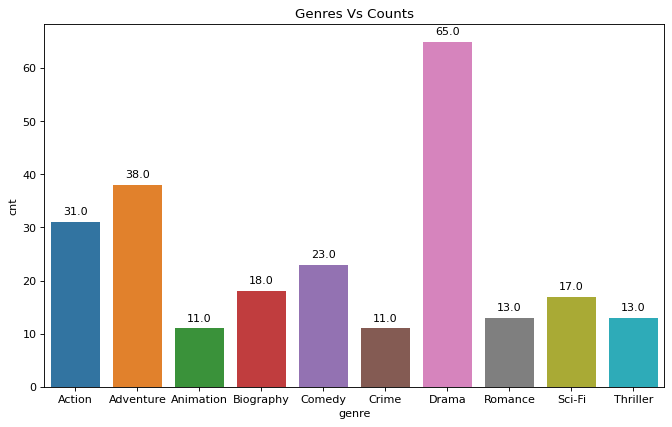

In [33]:
# Countplot for genres
plt.figure(figsize=(10, 6), dpi=80)
ax = sns.barplot(data=genre_top10, x='genre', y='cnt')
# Annotate
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
ax.set_title("Genres Vs Counts")
plt.show()


**`Checkpoint 5:`** Is the bar for `Drama` the tallest?

In [34]:
genre_top10.set_index('genre', inplace=True)
genre_top10

,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
genre,,,,,,,,,,,,,,,,,,,,,
Action,102144,114433,150895,94262,34688,12693,5386,3064,2115,5524,...,7.74,7.73,7.80,7.65,7.63,7.75,7.30,7.99,7.76,31.0
Adventure,94596,105636,138482,86367,31896,11551,4817,2718,1835,4575,...,7.75,7.73,7.87,7.68,7.64,7.84,7.38,7.99,7.79,38.0
Animation,61960,72566,104837,65707,22825,7551,2792,1430,911,2290,...,7.76,7.72,7.98,7.68,7.65,7.88,7.27,7.96,7.83,11.0
Biography,47333,77867,123948,74054,23644,7702,2984,1639,1145,2849,...,7.73,7.72,7.77,7.69,7.66,7.87,7.23,7.93,7.77,18.0
Comedy,60157,77173,108993,69176,26099,9863,4237,2444,1712,3842,...,7.71,7.71,7.75,7.61,7.60,7.70,7.19,7.94,7.78,23.0
Crime,52229,87919,129045,74671,25308,8971,3842,2246,1544,3383,...,7.72,7.76,7.61,7.63,7.62,7.68,7.39,7.98,7.80,11.0
Drama,52375,75928,109339,66456,23528,8497,3622,2078,1449,3250,...,7.71,7.71,7.72,7.64,7.62,7.74,7.22,7.94,7.78,65.0
Romance,42304,53037,82252,54833,21637,8530,3762,2130,1476,3082,...,7.61,7.61,7.66,7.52,7.50,7.61,6.92,7.83,7.70,13.0
Sci-Fi,136781,148873,176646,106005,39518,14951,6583,3876,2715,6731,...,7.86,7.85,7.84,7.71,7.69,7.74,7.52,8.09,7.88,17.0


-  ###  Subtask 3.3: Gender and Genre

If you have closely looked at the Votes- and CVotes-related columns, you might have noticed the suffixes `F` and `M` indicating Female and Male. Since we have the vote counts for both males and females, across various age groups, let's now see how the popularity of genres vary between the two genders in the dataframe. 

1. Make the first heatmap to see how the average number of votes of males is varying across the genres. Use seaborn heatmap for this analysis. The X-axis should contain the four age-groups for males, i.e., `CVotesU18M`,`CVotes1829M`, `CVotes3044M`, and `CVotes45AM`. The Y-axis will have the genres and the annotation in the heatmap tell the average number of votes for that age-male group. 

2. Make the second heatmap to see how the average number of votes of females is varying across the genres. Use seaborn heatmap for this analysis. The X-axis should contain the four age-groups for females, i.e., `CVotesU18F`,`CVotes1829F`, `CVotes3044F`, and `CVotes45AF`. The Y-axis will have the genres and the annotation in the heatmap tell the average number of votes for that age-female group. 

3. Make sure that you plot these heatmaps side by side using `subplots` so that you can easily compare the two genders and derive insights.

4. Write your any three inferences from this plot. You can make use of the previous bar plot also here for better insights.
Refer to this link- https://seaborn.pydata.org/generated/seaborn.heatmap.html. You might have to plot something similar to the fifth chart in this page (You have to plot two such heatmaps side by side).

5. Repeat subtasks 1 to 4, but now instead of taking the CVotes-related columns, you need to do the same process for the Votes-related columns. These heatmaps will show you how the two genders have rated movies across various genres.

You might need the below link for formatting your heatmap.
https://stackoverflow.com/questions/56942670/matplotlib-seaborn-first-and-last-row-cut-in-half-of-heatmap-plot

-  Note : Use `genre_top10` dataframe for this subtask

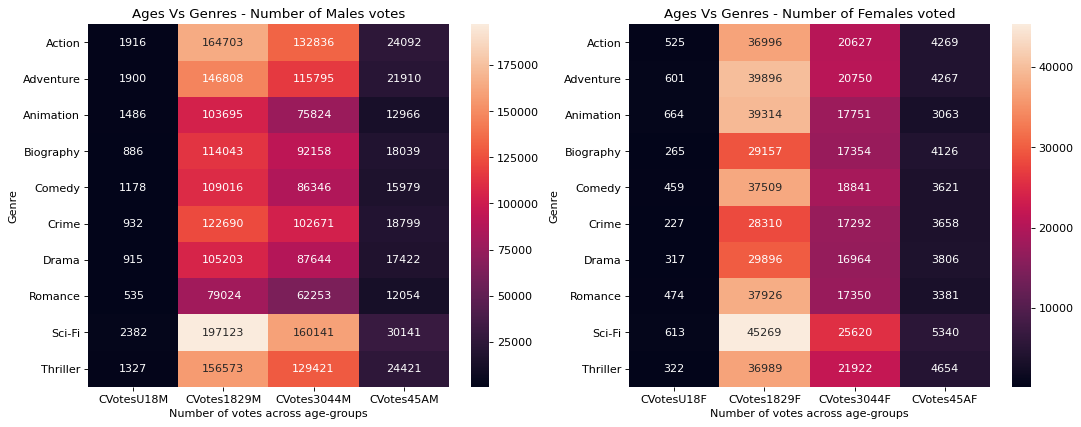

In [35]:
# 1st set of heat maps for CVotes-related columns
plt.figure(figsize=(16, 6), dpi=80)

plt.subplot(1, 2, 1)
ax=sns.heatmap(data=genre_top10[['CVotesU18M','CVotes1829M', 'CVotes3044M', 'CVotes45AM']],annot=True, fmt="d")
ax.set_title("Ages Vs Genres - Number of Males votes")
ax.set_ylabel('Genre')
ax.set_xlabel('Number of votes across age-groups')

plt.subplot(1, 2, 2)
ax=sns.heatmap(data=genre_top10[['CVotesU18F','CVotes1829F', 'CVotes3044F', 'CVotes45AF']],annot=True, fmt="d")
ax.set_title("Ages Vs Genres - Number of Females voted")
ax.set_ylabel('Genre')
ax.set_xlabel('Number of votes across age-groups')

plt.show()


**`Inferences:`** A few inferences that can be seen from the heatmap above is that males have voted more than females, and Sci-Fi appears to be most popular among the 18-29 age group irrespective of their gender. What more can you infer from the two heatmaps that you have plotted? Write your three inferences/observations below:
- Inference 1: Irrespective of gender, Under 18 and Above 45 have voted the least in their respetive genders
- Inference 2: Irrespective of gender, the 18-29 age group have voted more than the 30-44 age group for each of the genres. Similarly, the 30-44 age group have voted more than the Above 45 age group for each of the genres
- Inference 3: In females, the difference in the number of votes between the age groups 18-29 and 30-44 is more drastic than that in the males. 

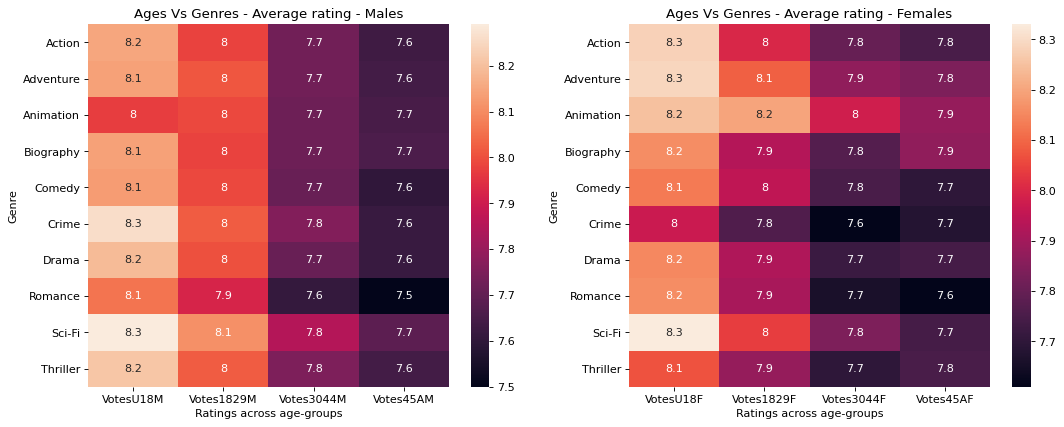

In [36]:
# 2nd set of heat maps for Votes-related columns
plt.figure(figsize=(16, 6), dpi=80)

plt.subplot(1, 2, 1)
ax=sns.heatmap(data=genre_top10[['VotesU18M','Votes1829M', 'Votes3044M', 'Votes45AM']],annot=True)
ax.set_title("Ages Vs Genres - Average rating - Males")
ax.set_ylabel('Genre')
ax.set_xlabel('Ratings across age-groups')

plt.subplot(1, 2, 2)
ax=sns.heatmap(data=genre_top10[['VotesU18F','Votes1829F', 'Votes3044F', 'Votes45AF']],annot=True)
ax.set_title("Ages Vs Genres - Average rating - Females")
ax.set_ylabel('Genre')
ax.set_xlabel('Ratings across age-groups')

plt.show()


**`Inferences:`** Sci-Fi appears to be the highest rated genre in the age group of U18 for both males and females. Also, females in this age group have rated it a bit higher than the males in the same age group. What more can you infer from the two heatmaps that you have plotted? Write your three inferences/observations below:
- Inference 1: In age group 18-29, males have rated higher than feamles for most genres. 
- Inference 2: The difference in the ratings between the age groups U18 and 18-29 is little more in the females than in the males. This probably indicates a decreased interest (in movies) with age in females 
- Inference 3: Sci-Fi genre gets most votes in all the age groups of males. While in females, the Sci-Fi gets most votes in U18 (along tih Adventure & Action) and Animation gets most votes in the rest of the age groups. While Sci-Fi remains the favorite genre across age groups in males in females the favorite genre shifts from Sci-Fi to Animation from 18 years onwards.

-  ###  Subtask 3.4: US vs non-US Cross Analysis

The dataset contains both the US and non-US movies. Let's analyse how both the US and the non-US voters have responded to the US and the non-US movies.

1. Create a column `IFUS` in the dataframe `movies`. The column `IFUS` should contain the value "USA" if the `Country` of the movie is "USA". For all other countries other than the USA, `IFUS` should contain the value `non-USA`.


2. Now make a boxplot that shows how the number of votes from the US people i.e. `CVotesUS` is varying for the US and non-US movies. Make use of the column `IFUS` to make this plot. Similarly, make another subplot that shows how non US voters have voted for the US and non-US movies by plotting `CVotesnUS` for both the US and non-US movies. Write any of your two inferences/observations from these plots.


3. Again do a similar analysis but with the ratings. Make a boxplot that shows how the ratings from the US people i.e. `VotesUS` is varying for the US and non-US movies. Similarly, make another subplot that shows how `VotesnUS` is varying for the US and non-US movies. Write any of your two inferences/observations from these plots.

Note : Use `movies` dataframe for this subtask. Make use of this documention to format your boxplot - https://seaborn.pydata.org/generated/seaborn.boxplot.html

In [37]:
# Creating IFUS column
movies.loc[movies['Country']=="USA", 'IFUS'] = 'USA'
movies.loc[movies['Country']!="USA", 'IFUS'] = 'non-USA'
movies[['Title','Country','IFUS']]

,Title,Country,IFUS
0,La La Land,USA,USA
1,Zootopia,USA,USA
2,Lion,Australia,non-USA
3,Arrival,USA,USA
4,Manchester by the Sea,USA,USA
...,...,...,...
95,Whiplash,USA,USA
96,Before Midnight,USA,USA
97,Star Wars: Episode VII - The Force Awakens,USA,USA
98,Harry Potter and the Deathly Hallows: Part I,UK,non-USA


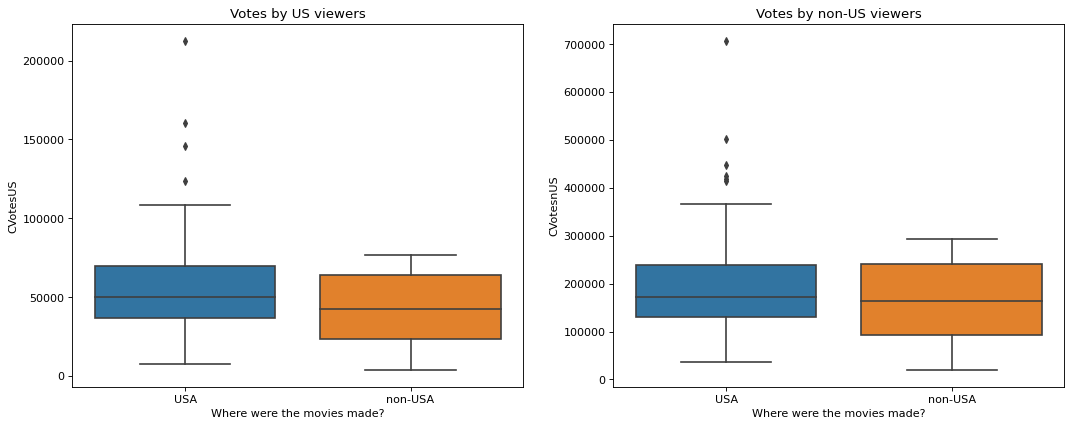

In [38]:
# Box plot - 1: CVotesUS(y) vs IFUS(x)
plt.figure(figsize=(16, 6), dpi=80)

plt.subplot(1, 2, 1)
ax = sns.boxplot(data=movies, x = 'IFUS', y='CVotesUS')
ax.set_xlabel("Where were the movies made?")
ax.set_title("Votes by US viewers")

plt.subplot(1, 2, 2)
ax = sns.boxplot(data=movies, x = 'IFUS', y='CVotesnUS')
ax.set_xlabel("Where were the movies made?")
ax.set_title("Votes by non-US viewers")

plt.show()


**`Inferences:`** Write your two inferences/observations below:
- Inference 1: Both US and non-US viewers voted more for the US movies than for non-USA movies i.e. the movies with most number of votes (from both US & non-US viewers) are from US.
- Inference 2: For non-US movies, the spread of votes for both US and non-US viewers is less as compared to the US-movies.

Text(0.5, 1.0, 'Rating by non-US viewers')

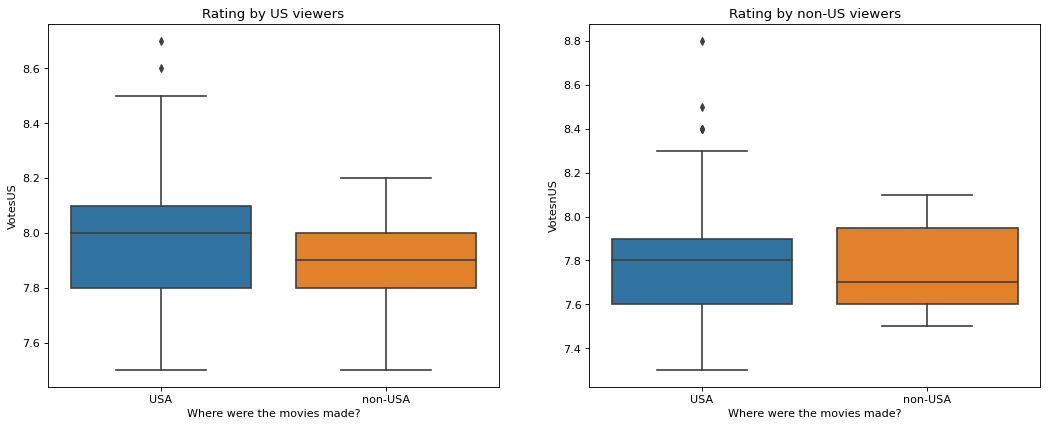

In [39]:
# Box plot - 2: VotesUS(y) vs IFUS(x)
plt.figure(figsize=(16, 6), dpi=80)

plt.subplot(1, 2, 1)
ax = sns.boxplot(data=movies, x = 'IFUS', y='VotesUS')
ax.set_xlabel("Where were the movies made?")
ax.set_title("Rating by US viewers")

plt.subplot(1, 2, 2)
ax = sns.boxplot(data=movies, x = 'IFUS', y='VotesnUS')
ax.set_xlabel("Where were the movies made?")
ax.set_title("Rating by non-US viewers")


**`Inferences:`** Write your two inferences/observations below:
- Inference 1: The movies that were highest rated by both US and non-US viewers are made in US. 
    - The 50%, 100% ratings US viewers have given is 8.0 and 8.5 respectively to a US movie. 
    - The 50%, 100% ratings  non-US viewers have given is 7.7 and 8.3 respectively to a US movie.
- Inference 2: Non-US viewers have given lesser ratings to movies (both US & non-US) compared to US viewers. For example, 
    - The 50%, 100% ratings US viewers have given US movies is 8.0 and 8.5 and for non-US movies is 7.9 and 8.2. 
    - While the 50%, 100% ratings non-US viewers have given US movies is 7.8 and 8.3 and non-US movies is 7.7 and 8.1

-  ###  Subtask 3.5:  Top 1000 Voters Vs Genres

You might have also observed the column `CVotes1000`. This column represents the top 1000 voters on IMDb and gives the count for the number of these voters who have voted for a particular movie. Let's see how these top 1000 voters have voted across the genres. 

1. Sort the dataframe genre_top10 based on the value of `CVotes1000`in a descending order.

2. Make a seaborn barplot for `genre` vs `CVotes1000`.

3. Write your inferences. You can also try to relate it with the heatmaps you did in the previous subtasks.




In [40]:
# Sorting by CVotes1000
genre_top10_sorted= genre_top10.sort_values(by=['CVotes1000'],ascending=False)['CVotes1000']
genre_top10_sorted.head(5)

genre
Sci-Fi       714
Action       681
Thriller     669
Adventure    662
Crime        620
Name: CVotes1000, dtype: int64

In [41]:
genre_top10

,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
genre,,,,,,,,,,,,,,,,,,,,,
Action,102144,114433,150895,94262,34688,12693,5386,3064,2115,5524,...,7.74,7.73,7.80,7.65,7.63,7.75,7.30,7.99,7.76,31.0
Adventure,94596,105636,138482,86367,31896,11551,4817,2718,1835,4575,...,7.75,7.73,7.87,7.68,7.64,7.84,7.38,7.99,7.79,38.0
Animation,61960,72566,104837,65707,22825,7551,2792,1430,911,2290,...,7.76,7.72,7.98,7.68,7.65,7.88,7.27,7.96,7.83,11.0
Biography,47333,77867,123948,74054,23644,7702,2984,1639,1145,2849,...,7.73,7.72,7.77,7.69,7.66,7.87,7.23,7.93,7.77,18.0
Comedy,60157,77173,108993,69176,26099,9863,4237,2444,1712,3842,...,7.71,7.71,7.75,7.61,7.60,7.70,7.19,7.94,7.78,23.0
Crime,52229,87919,129045,74671,25308,8971,3842,2246,1544,3383,...,7.72,7.76,7.61,7.63,7.62,7.68,7.39,7.98,7.80,11.0
Drama,52375,75928,109339,66456,23528,8497,3622,2078,1449,3250,...,7.71,7.71,7.72,7.64,7.62,7.74,7.22,7.94,7.78,65.0
Romance,42304,53037,82252,54833,21637,8530,3762,2130,1476,3082,...,7.61,7.61,7.66,7.52,7.50,7.61,6.92,7.83,7.70,13.0
Sci-Fi,136781,148873,176646,106005,39518,14951,6583,3876,2715,6731,...,7.86,7.85,7.84,7.71,7.69,7.74,7.52,8.09,7.88,17.0


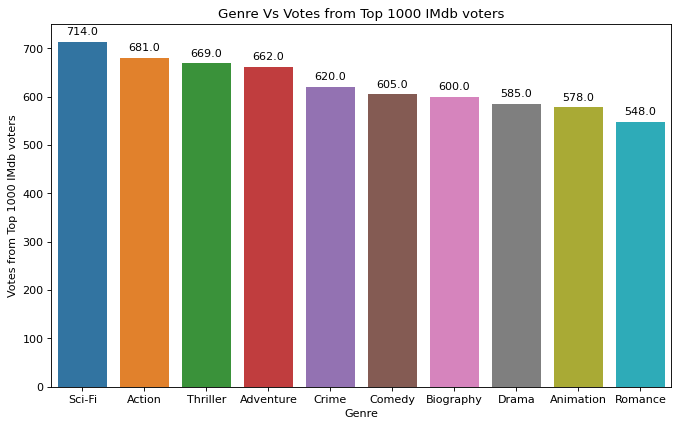

In [42]:
# Bar plot
plt.figure(figsize=(10, 6), dpi=80)
ax = sns.barplot(data=genre_top10_sorted.reset_index(), x='genre', y = 'CVotes1000')
# Annotate
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
ax.set_title("Genre Vs Votes from Top 1000 IMdb voters")
ax.set_xlabel("Genre")
ax.set_ylabel("Votes from Top 1000 IMdb voters")
plt.show()

**`Inferences:`** Write your inferences/observations here.
1. Sci-Fi genre movies are the most popular
2. Romance genre movies seems to be the least popular
3. The difference in the votes for various genres is not too great (<-150 approximately). There is no genre that is hugely popular or hugely unpopular. Various genres are more or less equally liked. 

**`Checkpoint 6:`** The genre `Romance` seems to be most unpopular among the top 1000 voters.

With the above subtask, your assignment is over. In your free time, do explore the dataset further on your own and see what kind of other insights you can get across various other columns.